In [98]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import sympy as sp
import handcalcs.render
import forallpeople as si
import matplotlib.pyplot as plt
%matplotlib inline
from math import tan, sin,cos, pi, radians, sqrt, trunc
from IPython.display import display, Markdown
si.environment('thermal', top_level=True)

In [2]:
cp = pd.read_excel('Compartments.xlsx')

In [3]:
cp

,Compartment,Af,H,q,O,b
0,Parking garage,127.50,2.20,300,0.02,1160
1,"Cafeteria, Delivery area, Trash area",268.86,4.90,200,0.04,773
2,Entrance and lounge,228.76,4.90,200,0.08,773
3,Atrium,417.82,5.25,150,0.12,800
4,Student workplaces,319.88,3.00,200,0.02,773
5,Auditorium,420.75,3.00,150,0.02,773
6,Office workspaces,325.00,3.00,200,0.02,773
7,Office workspaces 2,423.00,3.00,200,0.01,773
8,Skybar,420.00,3.00,200,0.12,860


In [14]:
cp['t_max'] = 0.0078*cp['q']/cp['O']
cp['gamma'] = (cp['O']/cp['b'])**2/(0.04/1160)**2

In [15]:
cp

,Compartment,Af,H,q,O,b,t_max,gamma
0,Parking garage,127.50,2.20,300,0.02,1160,117.00,0.250000
1,"Cafeteria, Delivery area, Trash area",268.86,4.90,200,0.04,773,39.00,2.251941
2,Entrance and lounge,228.76,4.90,200,0.08,773,19.50,9.007764
3,Atrium,417.82,5.25,150,0.12,800,9.75,18.922500
4,Student workplaces,319.88,3.00,200,0.02,773,78.00,0.562985
5,Auditorium,420.75,3.00,150,0.02,773,58.50,0.562985
6,Office workspaces,325.00,3.00,200,0.02,773,78.00,0.562985
7,Office workspaces 2,423.00,3.00,200,0.01,773,156.00,0.140746
8,Skybar,420.00,3.00,200,0.12,860,13.00,16.374256


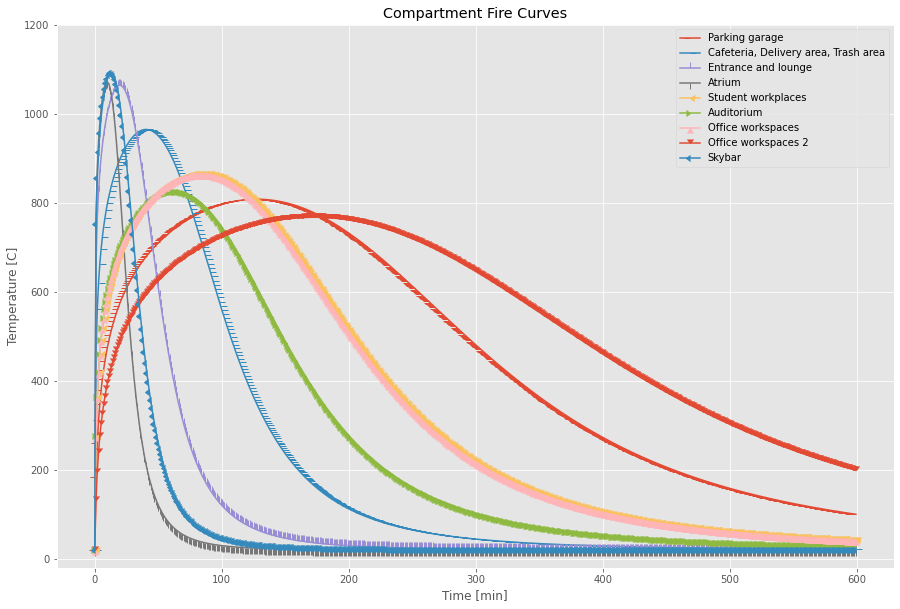

In [112]:
#iterate through each compartment
for i in range(len(cp)):
    #calculate the temperature of the compartment
    t = np.arange(0,600)
    T = 20+345*np.log10(8*cp['gamma'][i]*t+1)/(1+0.04*(t/cp['t_max'][i])**3.5)
    #create column with max temperature
    cp['T_max'][i] = T.max()
    #plot the temperature of the compartment
    plt.style.use('ggplot')
    plt.plot(t,T, label=cp['Compartment'][i],marker=i)
    plt.ylim(ymax=T.max()*1.1)
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Compartment Fire Curves')
    plt.legend()
    #make graph look bigger
    plt.gcf().set_size_inches(15,10)
    
    

    #mark max temperature on each graph
    #plt.annotate(str(round(cp['T_max'][i],2)), xy=(t[T.argmax()],T.max()), xytext=(t[T.argmax()],T.max()))
    
    

In [86]:
cp

,Compartment,Af,H,q,O,b,t_max,gamma,T_max
0,Parking garage,127.50,2.20,300,0.02,1160,117.00,0.250000,808.244664
1,"Cafeteria, Delivery area, Trash area",268.86,4.90,200,0.04,773,39.00,2.251941,964.822025
2,Entrance and lounge,228.76,4.90,200,0.08,773,19.50,9.007764,1064.228820
3,Atrium,417.82,5.25,150,0.12,800,9.75,18.922500,1071.275248
4,Student workplaces,319.88,3.00,200,0.02,773,78.00,0.562985,865.913698
5,Auditorium,420.75,3.00,150,0.02,773,58.50,0.562985,825.049385
6,Office workspaces,325.00,3.00,200,0.02,773,78.00,0.562985,865.913698
7,Office workspaces 2,423.00,3.00,200,0.01,773,156.00,0.140746,767.714225
8,Skybar,420.00,3.00,200,0.12,860,13.00,16.374256,1091.971354
